# INSTAGRAM SCRAPER & PROTEST DETECTION TOOL
## Targets Kenyan Gen-Z content with civic engagement focus

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv("Downloads/kenyan_genz_posts.csv")
codes = pd.read_csv("Downloads/protest_signal_codes.csv")

In [59]:
df

,Date,Platform,Content,Location
0,2024-07-12,TikTok,Gen Z rising again! Meet at Parliament for a s...,Parliament
1,2024-06-23,Instagram,This government is corrupt. Gather on 23/06 at...,Parliament
2,2024-07-29,TikTok,#GenZRevolution – strike at Kisumu urgent,Kisumu
3,2024-06-27,X,#SaveKenya – march at Mombasa immediately,Mombasa
4,2024-07-03,X,They brutalized our people – happening urgent ...,Kisumu
...,...,...,...,...
1995,2025-06-12,Instagram,March on June 12 in Parliament. We are fed up ...,Parliament
1996,2025-06-10,Instagram,This government is corrupt. Protest on 10/06 a...,Mombasa
1997,2025-07-08,X,They brutalized our people. Gather on 08/07 at...,Kisumu
1998,2025-07-18,TikTok,This government is corrupt – happening act fas...,Kisumu


In [61]:
codes

,Code,Signal
0,D,Date Mention
1,L,Location Mention
2,A,Action (protest-related term)
3,S,Negative Sentiment
4,U,Urgency/Crisis Call


In [63]:
def analyze_protest_signals(row):
    """Apply automated detection to manual data"""
    text = str(row['Content']).lower()
    signals = []
    
    # Date detection
    date_pattern = r'(\d{1,2}/\d{1,2}|jan|feb|mar|apr|may|jun|jul|aug|sept|oct|nov|dec)'
    if re.search(date_pattern, text):
        signals.append('D')
    
    # Location detection
    locations = ['nairobi', 'mombasa', 'kisumu', 'park', 'parliament']
    if any(loc in text for loc in locations):
        signals.append('L')
    
    # Action detection
    actions = ['march', 'protest', 'gather', 'boycott', 'strike']
    if any(action in text for action in actions):
        signals.append('A')
    
    # Sentiment analysis
    if TextBlob(text).sentiment.polarity < -0.5:
        signals.append('S')
    
    # Urgency detection
    if 'urgent' in text or 'now!' in text:
        signals.append('U')
    
    return ','.join(signals)

Text(0, 0.5, 'Frequency')

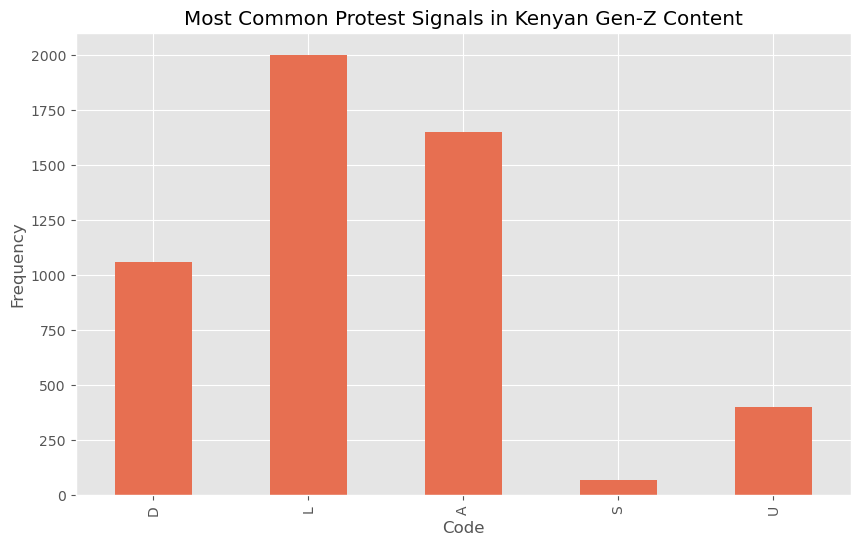

In [65]:
df['Auto_Signals'] = df.apply(analyze_protest_signals, axis=1)
df['Signal_Count'] = df['Auto_Signals'].apply(lambda x: len(x.split(',')) if x != '' else 0)

# ===== VISUALIZATION =====
plt.style.use('ggplot')

# 1. Signal Frequency
signal_counts = df['Auto_Signals'].str.split(',', expand=True).stack().value_counts()
signal_counts = signal_counts.reindex(codes['Code'])
plt.figure(figsize=(10,6))
signal_counts.plot(kind='bar', color='#E76F51')
plt.title('Most Common Protest Signals in Kenyan Gen-Z Content')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Protest Signal Density by Platform')

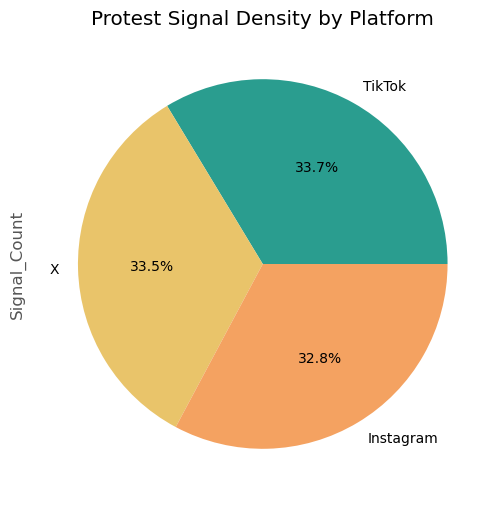

In [67]:
# 2. Platform Comparison
platform_signals = df.groupby('Platform')['Signal_Count'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
platform_signals.plot(kind='pie', autopct='%1.1f%%', colors=['#2A9D8F','#E9C46A','#F4A261'])
plt.title('Protest Signal Density by Platform')

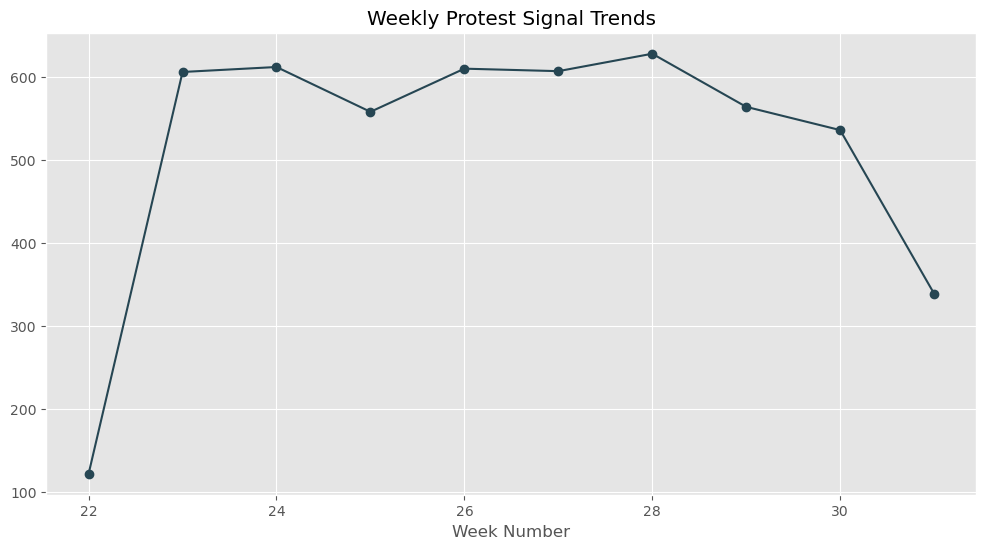

In [69]:
# 3. Time Analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
weekly_signals = df.groupby('Week')['Signal_Count'].sum()
plt.figure(figsize=(12,6))
weekly_signals.plot(marker='o', linestyle='-', color='#264653')
plt.title('Weekly Protest Signal Trends')
plt.xlabel('Week Number')
plt.grid(True)

Text(0.5, 1.0, 'Protest Language in Kenyan Gen-Z Content')

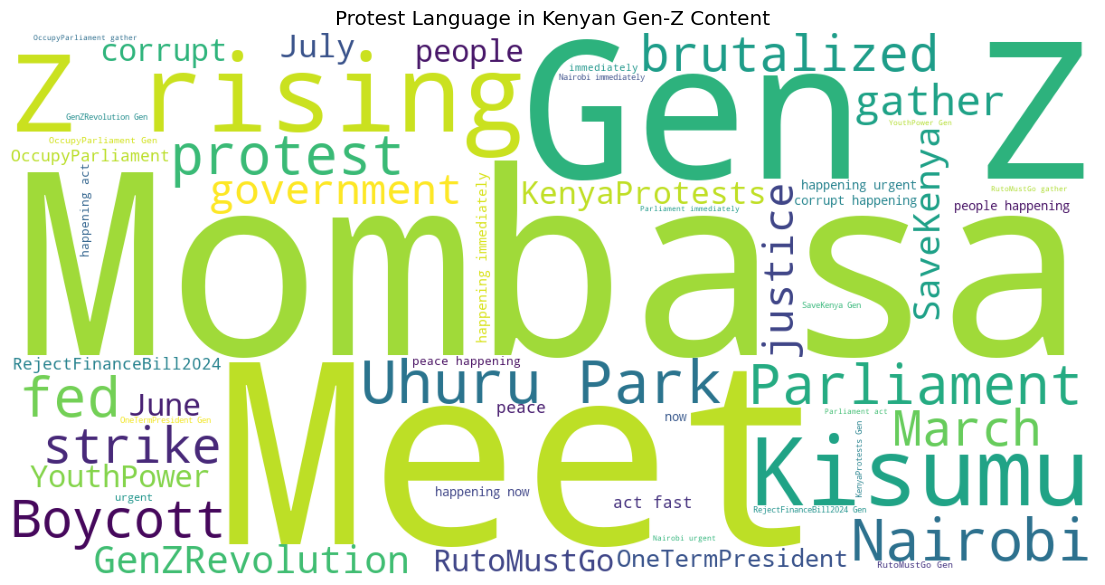

In [71]:
# 4. Word Cloud
protest_text = ' '.join(df[df['Signal_Count'] > 0]['Content'])
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      colormap='viridis').generate(protest_text)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Protest Language in Kenyan Gen-Z Content')

Text(0.5, 0, 'Signal Count')

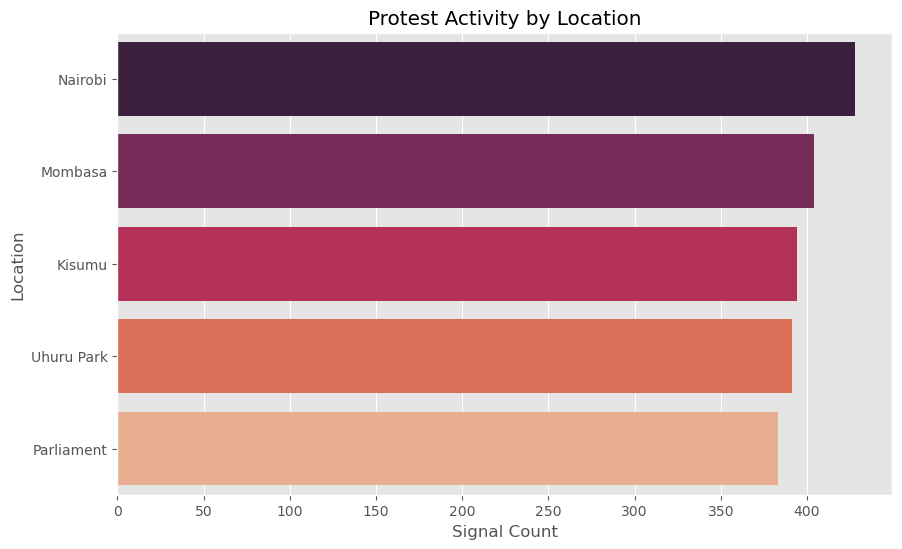

In [73]:
# 5. Location Heatmap
location_counts = df[df['Signal_Count'] > 0]['Location'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='rocket')
plt.title('Protest Activity by Location')
plt.xlabel('Signal Count')

In [75]:
# ===== EXPORT INSIGHTS =====
protest_df = df[df['Signal_Count'] > 0]
protest_df.to_excel('detected_protest_signals.xlsx', index=False)

print(f"Detected {len(protest_df)} protest signals from {len(df)} posts")

Detected 2000 protest signals from 2000 posts
